In [1]:
from PIL import Image
from pathlib import Path
from shutil import copy

import numpy as np
import json
import os
import matplotlib.pyplot as plt

In [4]:
imgs = !ls ~/bas

In [5]:
imgs = [Path('/home/michal/bas') / f for f in imgs]
imgs[:10]

[PosixPath("/home/michal/bas/ls: cannot access '/home/michal/bas': No such file or directory")]

In [71]:
from skimage.filters import sobel

In [4]:
from skimage.filters import threshold_otsu

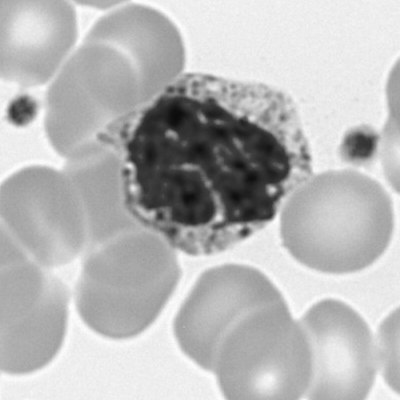

In [54]:
im = Image.open(imgs[-7]).convert('L')
im

In [85]:
from skimage import feature

In [86]:
x = np.array(im)/ 255
t = feature.canny(x)

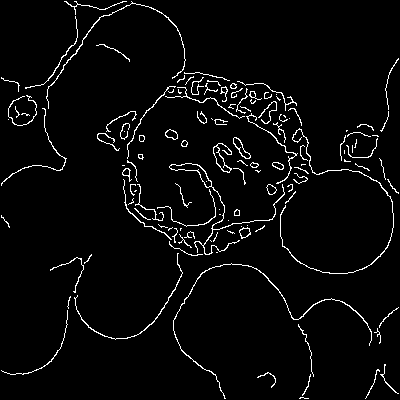

In [87]:
Image.fromarray((t * 255).astype(np.uint8))

In [88]:
t = threshold_otsu(x)
res = np.zeros_like(x)
res[x <= t] = 1

In [89]:
import os

In [112]:
clss = Path('/home/michal/AML-Cytomorphology_LMU')
converted = Path('/home/michal/converted')
!rm -rf $converted
for cls in os.listdir(clss):
    for img in os.listdir(clss / cls):
        path = clss / cls / img
        bname, _ = os.path.splitext(img)
        os.makedirs(converted / cls, exist_ok=True)
        Image.open(path).convert('RGB').save(converted / cls / f'{bname}.jpg')

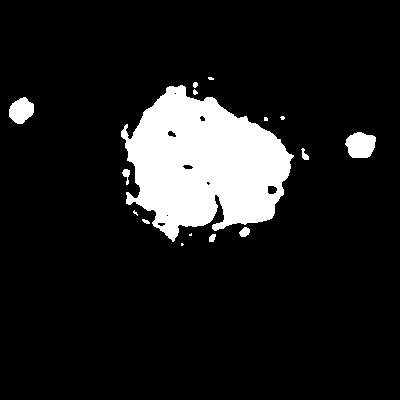

In [90]:
Image.fromarray((res * 255).astype(np.uint8))

In [27]:
def process_file(json_path, perc=5):
    with open(json_path, 'r') as fin:
        data = json.load(fin)
        
    data = sorted(data, key=lambda i: i['mean_score_prediction'])[::-1]
    print('#images:', len(data))
    thresh = np.percentile([i['mean_score_prediction'] for i in data], perc)
    thresh
    
    to_keep, to_remove = [], []
    for d in data:
        if d['mean_score_prediction'] >= thresh:
            to_keep.append(d)
        else:
            to_remove.append(d)
            
    print('Keeping:', len(to_keep))
    print('Removing:', len(to_remove))
            
    return to_keep, to_remove

def process_jsons(root_dir, dst_dir, perc=5):
    root_dir = Path(root_dir)
    dst_dir = Path(dst_dir)
    g_dir = dst_dir / 'good'
    b_dir = dst_dir / 'bad'
    
    for cls in os.listdir(root_dir):
        json_path = f'/home/michal/h4h_team5/image-quality-assessment/{cls}.json'
        print('Processing:', cls)
        to_keep, to_remove = process_file(json_path, perc=perc)
        os.makedirs(g_dir,)
        for f in to_keep:
            copy(root_dir / cls/ f, dst_dir / cls / f)
g, b = process_file('/home/michal/h4h_team5/image-quality-assessment/res.json', perc=5)

#images: 18365
Keeping: 17446
Removing: 919


In [44]:
r = Path('/home/michal/AML-Cytomorphology_LMU')
d = Path('/home/michal/final/')

for cls in os.listdir(r):
    for f in [f for f in g if cls in f['image_id']]:
        f = f"{f['image_id']}.tiff"
        os.makedirs(d / cls, exist_ok=True)
        copy(r / cls / f, d / cls / f)